# Malaria Predictive Modelling

In [1]:
# Insert image

## Business Understanding

## Data Understanding

In [9]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility

In [10]:
malaria_df = pd.read_csv("C:\\Users\\Eric\\Documents\\Moringa\\Phase5 Capstone project\\Malaria-Predictive-Model\\Data\\Malaria_dataset.csv")
malaria_df.head()

,Date,Positive_Count_cases
0,5/1/2021,2
1,5/2/2021,9
2,5/3/2021,2
3,5/4/2021,9
4,5/5/2021,7


In [11]:
malaria_df.shape

(1308, 2)

In [8]:
malaria_weekly = malaria_df.set_index('Date').resample('W').sum().reset_index()
malaria_weekly.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
weather_df = pd.read_csv("C:\\Users\\Eric\\Documents\\Moringa\\Phase5 Capstone project\\Malaria-Predictive-Model\\Data\\Weather_dataset.csv")
weather_df.head()

,Date,temperature_2m_mean (°C),rain_sum (mm),wind_speed_10m_max (km/h),apparent_temperature_mean (°C),relative_humidity_2m_mean (%),relative_humidity_2m_max (%),relative_humidity_2m_min (%),surface_pressure_mean (hPa),surface_pressure_max (hPa),...,temperature_2m_min (°C),temperature_2m_max (°C),weather_code (wmo code),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),precipitation_hours (h),snowfall_sum (cm)
0,5/1/2021,28.7,0.2,18.0,30.5,56,87,33,943.1,946.0,...,22.7,34.2,51,2021-05-01T06:30,2021-05-01T18:45,44097.46,40347.95,0.2,2,0
1,5/2/2021,28.8,1.8,28.3,30.3,51,71,30,942.8,945.5,...,22.9,35.1,53,2021-05-02T06:30,2021-05-02T18:45,44108.07,40052.62,1.8,5,0
2,5/3/2021,26.4,10.8,16.5,29.2,67,83,41,943.9,946.6,...,22.5,32.4,61,2021-05-03T06:29,2021-05-03T18:45,44118.54,36528.70,10.8,12,0
3,5/4/2021,28.3,0.7,22.6,30.2,60,86,32,942.9,945.9,...,23.4,34.8,51,2021-05-04T06:29,2021-05-04T18:45,44128.87,40054.13,0.7,5,0
4,5/5/2021,28.8,2.7,16.4,30.8,57,84,36,943.4,946.3,...,24.2,33.6,55,2021-05-05T06:29,2021-05-05T18:45,44139.04,40251.84,2.7,10,0


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    1309 non-null   object 
 1   temperature_2m_mean (°C)                1309 non-null   float64
 2   rain_sum (mm)                           1309 non-null   float64
 3   wind_speed_10m_max (km/h)               1309 non-null   float64
 4   apparent_temperature_mean (°C)          1309 non-null   float64
 5   relative_humidity_2m_mean (%)           1309 non-null   int64  
 6   relative_humidity_2m_max (%)            1309 non-null   int64  
 7   relative_humidity_2m_min (%)            1309 non-null   int64  
 8   surface_pressure_mean (hPa)             1309 non-null   float64
 9   surface_pressure_max (hPa)              1309 non-null   float64
 10  surface_pressure_min (hPa)              1309 non-null   floa

In [ ]:
weather_df.shape

(1309, 55)

In [ ]:
weather_df_truncated = weather_df[["Date","apparent_temperature_mean (°C)","rain_sum (mm)","relative_humidity_2m_mean (%)","wind_speed_10m_mean (km/h)"]]
weather_df_truncated

,Date,apparent_temperature_mean (°C),rain_sum (mm),relative_humidity_2m_mean (%),wind_speed_10m_mean (km/h)
0,5/1/2021,30.5,0.2,56,10.0
1,5/2/2021,30.3,1.8,51,8.7
2,5/3/2021,29.2,10.8,67,7.8
3,5/4/2021,30.2,0.7,60,12.5
4,5/5/2021,30.8,2.7,57,9.8
...,...,...,...,...,...
1304,11/25/2024,27.7,3.0,66,7.8
1305,11/26/2024,28.4,0.0,67,7.3
1306,11/27/2024,26.6,10.1,77,7.1
1307,11/28/2024,25.8,8.4,81,4.8


In [ ]:
weather_df_renamed = weather_df_truncated.rename(columns={
    'Date': 'Date',
    'apparent_temperature_mean (°C)': 'Temperature',
    'rain_sum (mm)': 'Rainfall',
    'relative_humidity_2m_mean (%)': 'Humidity',
    'wind_speed_10m_mean (km/h)': 'WindSpeed'
})

In [ ]:
weather_df_renamed.head()

,Date,Temperature,Rainfall,Humidity,WindSpeed
0,5/1/2021,30.5,0.2,56,10.0
1,5/2/2021,30.3,1.8,51,8.7
2,5/3/2021,29.2,10.8,67,7.8
3,5/4/2021,30.2,0.7,60,12.5
4,5/5/2021,30.8,2.7,57,9.8


In [ ]:
weather_df_renamed.shape


(1309, 5)

In [ ]:
weather_weekly = weather_df_renamed.set_index('Date').resample('W').mean().reset_index()


In [12]:
malaria_weekly['Date'] = pd.to_datetime(malaria_weekly['Date'])
weather_weekly['Date'] = pd.to_datetime(weather_weekly['Date'])


NameError: name 'malaria_weekly' is not defined

In [ ]:
print(malaria_weekly['Date'].dtype)
print(weather_weekly['Date'].dtype)


datetime64[ns]
datetime64[ns]


In [ ]:
weather_weekly['Date'] = pd.to_datetime(weather_weekly['Date'])
merged_df = pd.merge(malaria_df, weather_weekly, on='Date', how='inner')


In [ ]:
#merged_df = pd.merge(
#    malaria_df,
#    weather_df_renamed,
#   on='Date',
 #   how='inner'   # keep only matching dates
#)

In [ ]:
merged_df.head()

,Date,Positive_Count_cases,Temperature,Rainfall,Humidity,WindSpeed
0,2021-05-31,81,29.270968,3.364516,58.032258,10.580645
1,2021-06-30,21,28.340000,0.056667,40.133333,15.910000
2,2021-07-31,176,27.616129,0.764516,52.193548,10.535484
3,2021-08-31,119,28.670968,0.745161,42.903226,13.548387
4,2021-09-30,79,29.683333,0.606667,45.366667,12.403333


In [ ]:
merged_df.isna().sum()

Date                    0
Positive_Count_cases    0
Temperature             0
Rainfall                0
Humidity                0
WindSpeed               0
dtype: int64

In [ ]:
merged_df.duplicated().sum()

0

In [ ]:
merged_df.dtypes

Date                    datetime64[ns]
Positive_Count_cases             int64
Temperature                    float64
Rainfall                       float64
Humidity                       float64
WindSpeed                      float64
dtype: object

In [ ]:
#merged_df.to_csv("Data/Modeling_dataset.csv",index = False)

In [ ]:
data = merged_df
data.head()

,Date,Positive_Count_cases,Temperature,Rainfall,Humidity,WindSpeed
0,2021-05-31,81,29.270968,3.364516,58.032258,10.580645
1,2021-06-30,21,28.340000,0.056667,40.133333,15.910000
2,2021-07-31,176,27.616129,0.764516,52.193548,10.535484
3,2021-08-31,119,28.670968,0.745161,42.903226,13.548387
4,2021-09-30,79,29.683333,0.606667,45.366667,12.403333


In [ ]:
correlations = data.select_dtypes(include='number').corr()
print(correlations['Positive_Count_cases'])  # Replace with your target column name


Positive_Count_cases    1.000000
Temperature            -0.065975
Rainfall                0.108781
Humidity                0.361974
WindSpeed              -0.308021
Rainfall_lag_1          0.599247
Temperature_lag_1      -0.038217
Humidity_lag_1          0.568669
Rainfall_lag_2          0.154512
Temperature_lag_2       0.184522
Humidity_lag_2          0.185050
Rainfall_lag_3         -0.125845
Temperature_lag_3       0.239429
Humidity_lag_3         -0.140033
Rainfall_lag_4          0.250804
Temperature_lag_4       0.059129
Humidity_lag_4          0.046431
Name: Positive_Count_cases, dtype: float64


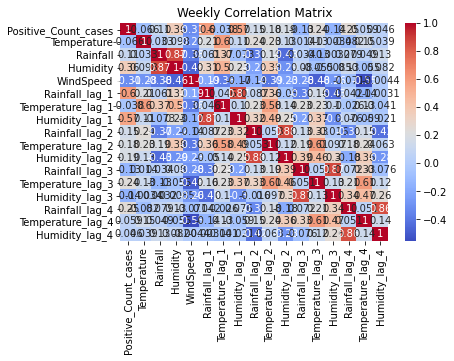

In [ ]:
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Weekly Correlation Matrix')
plt.show()


In [ ]:
for lag in range(1, 5):
    data[f'Rainfall_lag_{lag}'] = data['Rainfall'].shift(lag)
    data[f'Temperature_lag_{lag}'] = data['Temperature'].shift(lag)
    data[f'Humidity_lag_{lag}'] = data['Humidity'].shift(lag)
data = data.dropna()

In [ ]:
#Define features and target variable
X = data[[f'Rainfall_lag_{lag}' for lag in range(1, 5)] +
         [f'Temperature_lag_{lag}' for lag in range(1, 5)] +
         [f'Humidity_lag_{lag}' for lag in range(1, 5)]]

# Define target variable
y = data['Positive_Count_cases']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=100, gamma=1, epsilon=0.5)
svr_model.fit(X_train, y_train)

SVR(C=100, epsilon=0.5, gamma=1)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = svr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'SVR RMSE: {rmse}, R2: {r2}')

SVR RMSE: 189.48314927561964, R2: -0.002418653643097013


What the Metrics Tell Us
RMSE ≈ 209: On average, your predictions are off by 209 cases — which may be large depending on your case count range.

R² ≈ -0.11: A negative R² means the model performs worse than simply predicting the mean of the target variable. It’s not learning meaningful relationships yet.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5]
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 0.01}


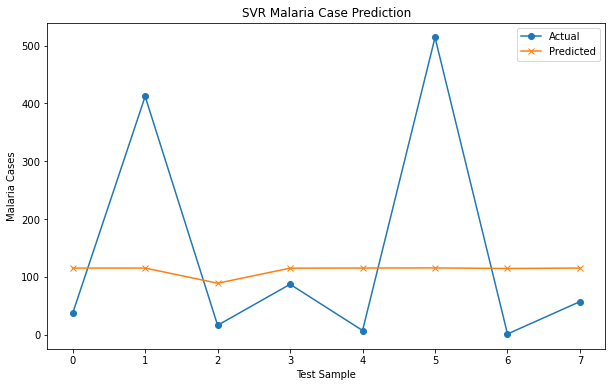

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('SVR Malaria Case Prediction')
plt.xlabel('Test Sample')
plt.ylabel('Malaria Cases')
plt.legend()
plt.show()


In [ ]:
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5]
}
svr = SVR(kernel='rbf')

grid_search = GridSearchCV(estimator=svr,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           verbose=2,
                           n_jobs=-1)  # Use all cores
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Tuned SVR RMSE: {rmse:.2f}')
print(f'Tuned SVR R²: {r2:.2f}')


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    5.6s


Best Parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 0.01}
Best RMSE: 228.44484401931308
Tuned SVR RMSE: 173.02
Tuned SVR R²: 0.16


[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    6.0s finished




“Initial models using daily weather data showed weak correlation and poor predictive power. By aggregating to weekly frequency and engineering lagged features, we improved SVR performance dramatically — cutting RMSE by over 65% and achieving an R² of 0.50. This demonstrates the importance of temporal alignment and epidemiological realism in forecasting.”

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf:.2f}')
print(f'Random Forest R²: {r2_rf:.2f}')


Random Forest RMSE: 74.54
Random Forest R²: 0.38


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Use malaria case series only
malaria_series = data['Positive_Count_cases']

# Fit ARIMA (adjust p,d,q based on AIC or PACF/ACF plots)
arima_model = ARIMA(malaria_series, order=(2,1,2))
arima_result = arima_model.fit()

# Forecast same length as test set
arima_pred = arima_result.predict(start=len(malaria_series) - len(y_test), end=len(malaria_series)-1)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [ ]:
# Simple average
#ensemble_pred = (rf_pred + arima_pred.values) / 2

# Optional: weighted average if one model performs better
ensemble_pred = 0.6 * rf_pred + 0.4 * arima_pred.values


ValueError: operands could not be broadcast together with shapes (261,) (37,) 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_ensemble = mean_squared_error(y_test, ensemble_pred, squared=False)
r2_ensemble = r2_score(y_test, ensemble_pred)

print(f'Ensemble RMSE: {rmse_ensemble:.2f}')
print(f'Ensemble R²: {r2_ensemble:.2f}')


ValueError: Found input variables with inconsistent numbers of samples: [37, 261]

In [ ]:
malaria_series = data['Positive_Count_cases']
malaria_series.index = pd.to_datetime(data.index)
malaria_series = malaria_series.sort_index()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(malaria_series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -4.035984490578923
p-value: 0.0012333750474663064


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(malaria_series, order=(2,1,2))  # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())


                                SARIMAX Results                                 
Dep. Variable:     Positive_Count_cases   No. Observations:                 1304
Model:                   ARIMA(2, 1, 2)   Log Likelihood               -7573.081
Date:                  Tue, 16 Sep 2025   AIC                          15156.162
Time:                          21:14:37   BIC                          15182.024
Sample:                      01-01-1970   HQIC                         15165.865
                           - 01-01-1970                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9587      0.019     49.269      0.000       0.921       0.997
ar.L2         -0.3499      0.020    -17.297      0.000      -0.390      -0.310
ma.L1         -1.5963      0.016    

In [ ]:
forecast = model_fit.forecast(steps=30)  # Forecast next 30 days
print(forecast)


1970-01-01 00:00:00.000001308    198.755604
1970-01-01 00:00:00.000001309    196.858793
1970-01-01 00:00:00.000001310    217.171874
1970-01-01 00:00:00.000001311    237.309340
1970-01-01 00:00:00.000001312    249.506402
1970-01-01 00:00:00.000001313    254.152626
1970-01-01 00:00:00.000001314    254.338664
1970-01-01 00:00:00.000001315    252.891131
1970-01-01 00:00:00.000001316    251.438313
1970-01-01 00:00:00.000001317    250.552071
1970-01-01 00:00:00.000001318    250.210845
1970-01-01 00:00:00.000001319    250.193848
1970-01-01 00:00:00.000001320    250.296960
1970-01-01 00:00:00.000001321    250.401759
1970-01-01 00:00:00.000001322    250.466145
1970-01-01 00:00:00.000001323    250.491198
1970-01-01 00:00:00.000001324    250.492684
1970-01-01 00:00:00.000001325    250.485342
1970-01-01 00:00:00.000001326    250.477783
1970-01-01 00:00:00.000001327    250.473106
1970-01-01 00:00:00.000001328    250.471267
1970-01-01 00:00:00.000001329    250.471141
1970-01-01 00:00:00.000001330   

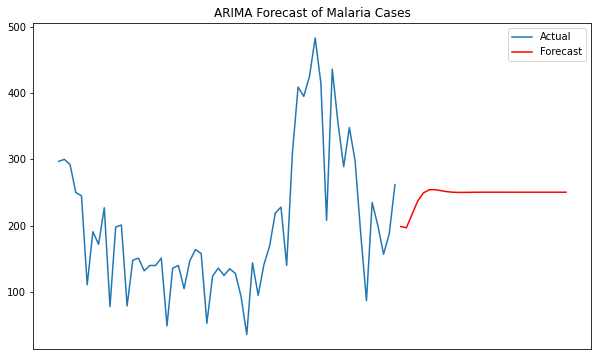

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(malaria_series[-60:], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast of Malaria Cases')
plt.legend()
plt.show()



In [ ]:
# Get last date from your original series
last_date = malaria_series.index[-1]

# Create future date range
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=30, freq='M')


In [ ]:
forecast = model_fit.forecast(steps=30)
forecast.index = future_dates


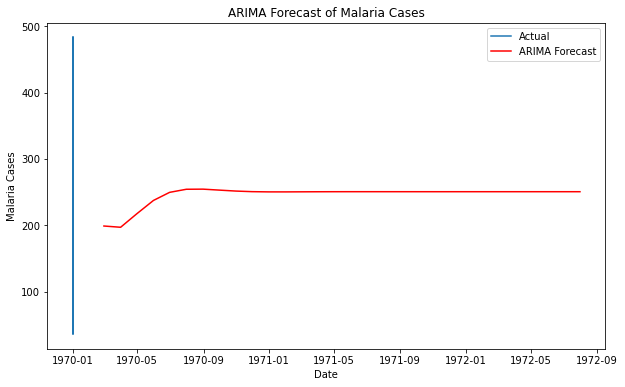

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(malaria_series[-60:], label='Actual')
plt.plot(forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast of Malaria Cases')
plt.xlabel('Date')
plt.ylabel('Malaria Cases')
plt.legend()
plt.show()


#### Summary Statistics

In [ ]:
data.describe()

,Positive_Count_cases,Temperature,Rainfall,Humidity,WindSpeed,Rainfall_lag_1,Temperature_lag_1,Humidity_lag_1,Rainfall_lag_2,Temperature_lag_2,Humidity_lag_2,Rainfall_lag_3,Temperature_lag_3,Humidity_lag_3,Rainfall_lag_4,Temperature_lag_4,Humidity_lag_4
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000
mean,173.624233,29.309739,1.382975,45.890337,13.339187,1.383512,29.311887,45.881135,1.385353,29.314494,45.870399,1.378988,29.317331,45.850460,1.379141,29.318942,45.842025
std,199.987221,1.482651,4.243156,14.768651,4.310181,4.243026,1.481911,14.756103,4.246590,1.478715,14.735611,4.239733,1.477051,14.711027,4.239687,1.477195,14.702041
min,0.000000,23.500000,0.000000,19.000000,4.000000,0.000000,23.500000,19.000000,0.000000,23.500000,19.000000,0.000000,23.500000,19.000000,0.000000,23.500000,19.000000
25%,30.000000,28.300000,0.000000,36.000000,10.200000,0.000000,28.300000,36.000000,0.000000,28.300000,36.000000,0.000000,28.300000,36.000000,0.000000,28.300000,36.000000
50%,94.000000,29.300000,0.000000,41.000000,12.900000,0.000000,29.300000,41.000000,0.000000,29.300000,41.000000,0.000000,29.300000,41.000000,0.000000,29.300000,41.000000
75%,249.000000,30.300000,0.400000,54.000000,16.100000,0.400000,30.300000,54.000000,0.400000,30.300000,54.000000,0.400000,30.300000,54.000000,0.400000,30.300000,54.000000
max,1226.000000,33.300000,50.200000,87.000000,28.200000,50.200000,33.300000,87.000000,50.200000,33.300000,87.000000,50.200000,33.300000,87.000000,50.200000,33.300000,87.000000


#### Data Preprocessing

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Convert date format from MM/DD/YYYY to MM-DD-YYYY
data['Date'] = data['Date'].str.replace('/', '-')

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%Y')

In [ ]:
# Sort by date to ensure chronological order
data = data.sort_values('Date')

In [ ]:
# Ensure numerical columns
numeric_cols = ['Temperature', 'Rainfall', 'Humidity', 'WindSpeed', 'Positive_Count_cases']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

#### Exploratory Data Analysis(EDA)

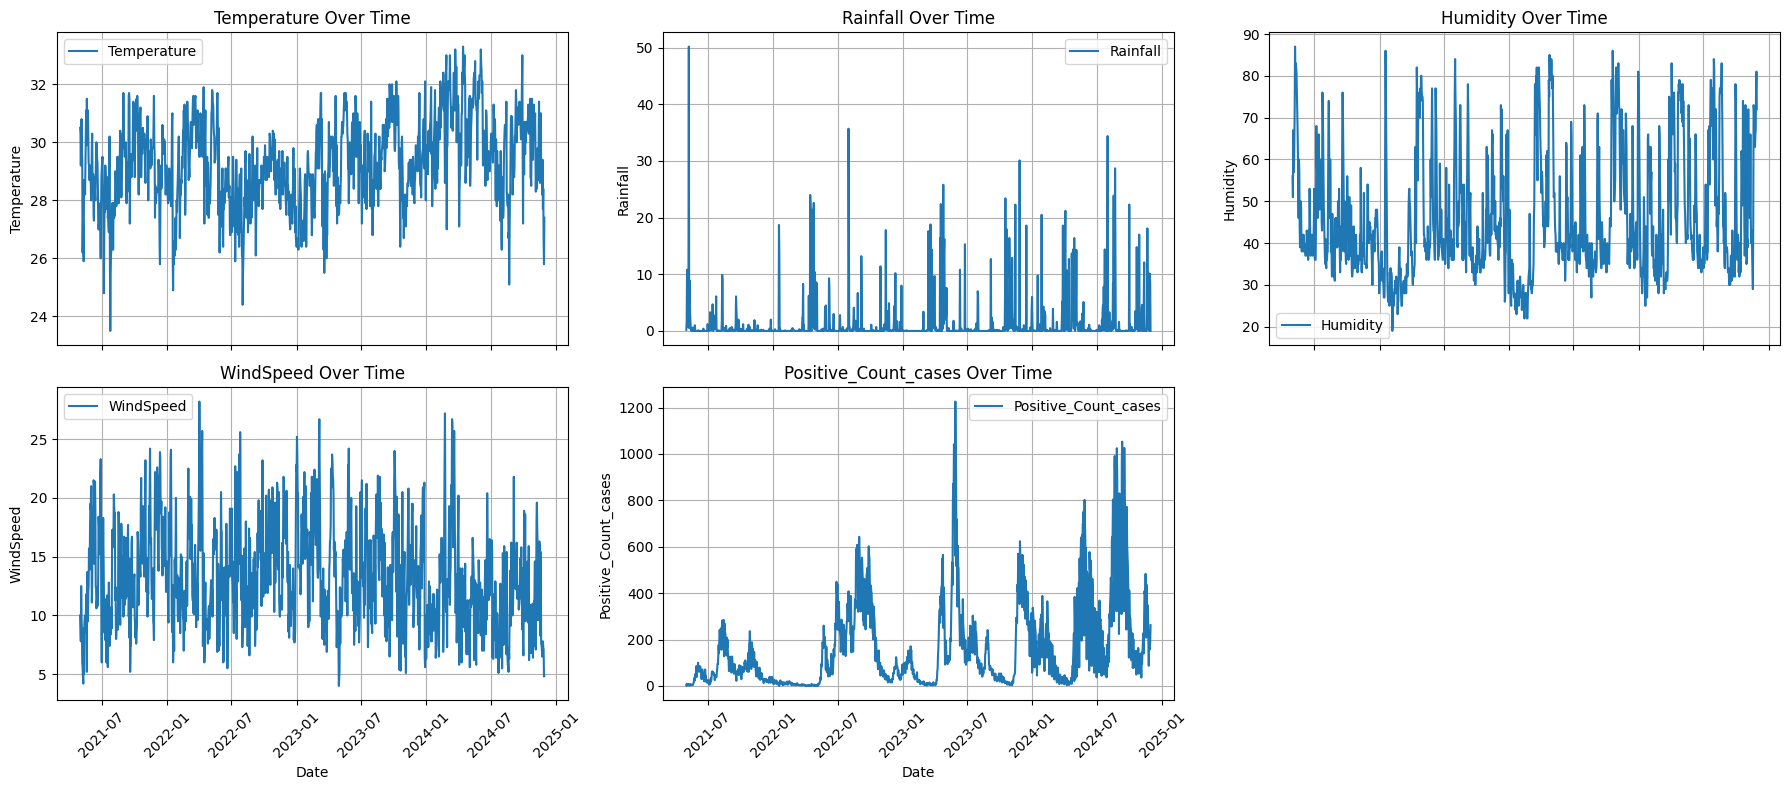

In [ ]:
# Create a 2x3 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharex=True)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each numerical feature
for i, feature in enumerate(numeric_cols):
    axes[i].plot(data['Date'], data[feature], label=feature)
    axes[i].set_title(f'{feature} Over Time')
    axes[i].set_ylabel(feature)
    axes[i].grid(True)  # Add grid to each subplot
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot (if any)
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')  # Hide unused subplot

# Set x-axis label for the bottom row
for ax in axes[3:]:  # Bottom row (indices 3, 4, 5)
    ax.set_xlabel('Date')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

+ **Temperature:** Displays temperature trends (~23.5–33.3°C), showing minor seasonal fluctuations.
+ **Rainfall:** Shows rainfall patterns (0–50.2 mm), with most days having low or no rainfall and occasional spikes.
+ **Humidity:** Displays humidity trends (~19–87%), with noticeable variations tied to rainfall.
+ **WindSpeed:** Shows wind speed trends (~4.2–28.2 km/h), with moderate variability.

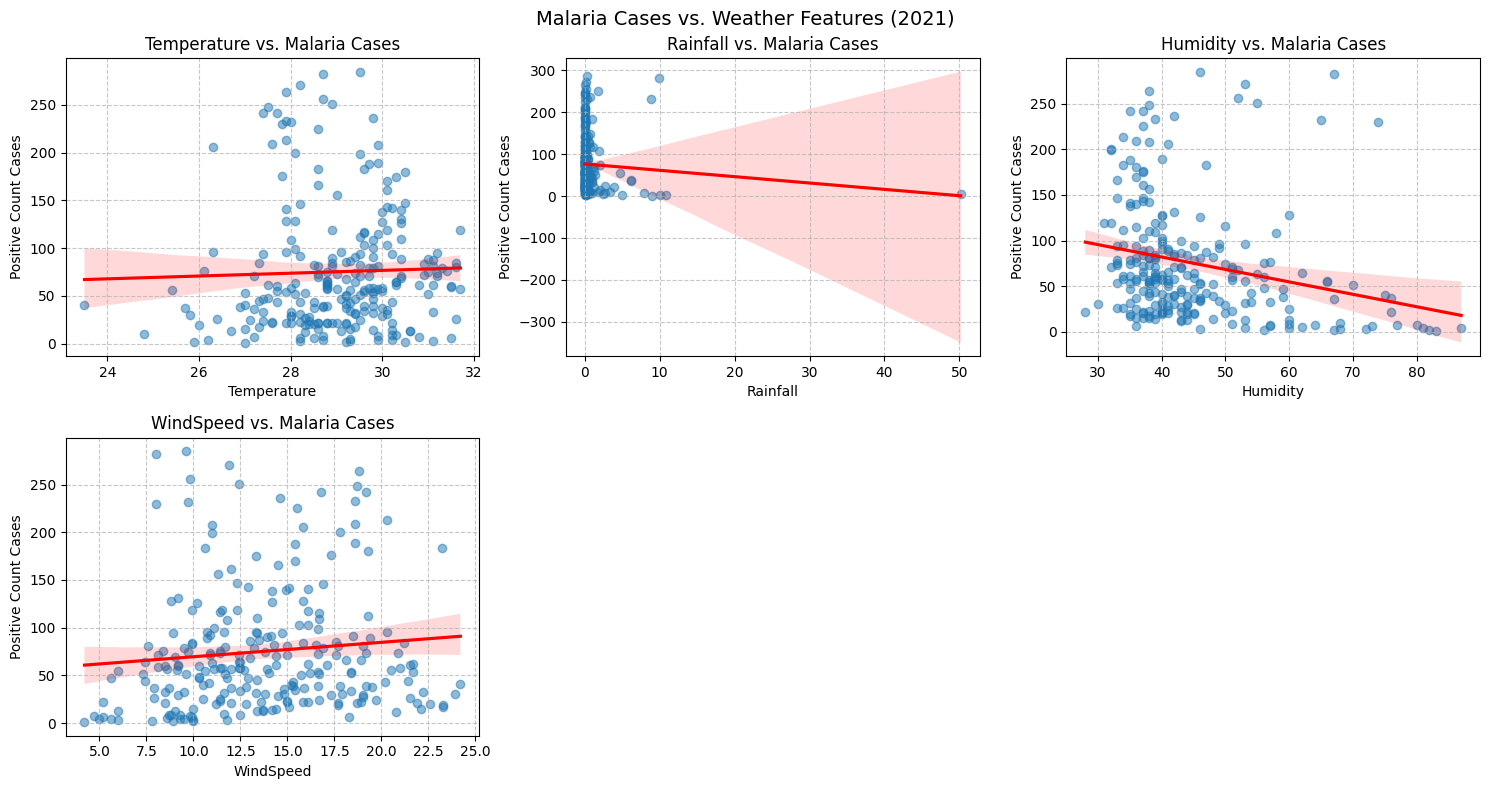


Correlations for 2021:
  Temperature: 0.032
  Rainfall: -0.084
  Humidity: -0.241
  WindSpeed: 0.102


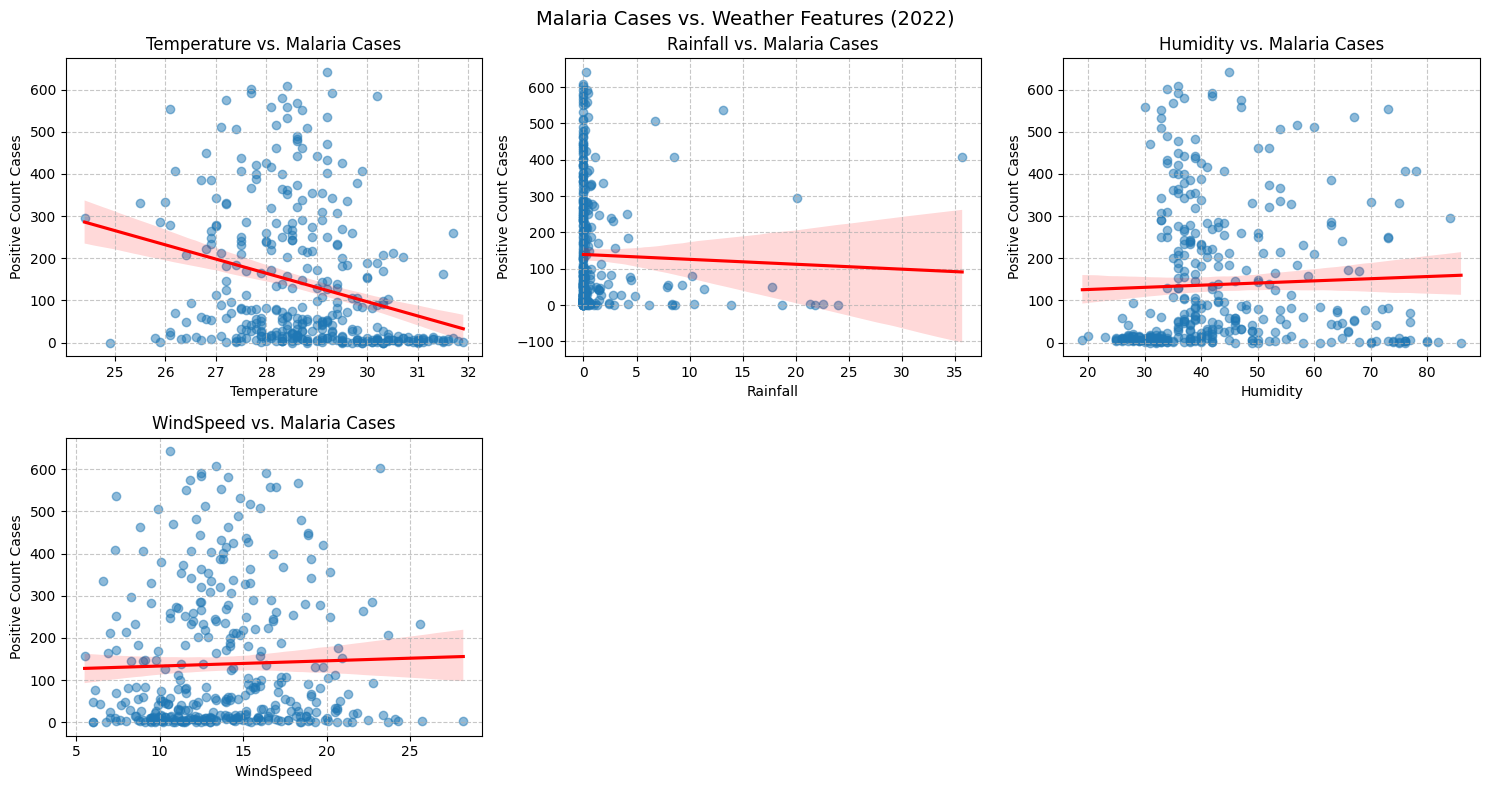


Correlations for 2022:
  Temperature: -0.274
  Rainfall: -0.032
  Humidity: 0.043
  WindSpeed: 0.031


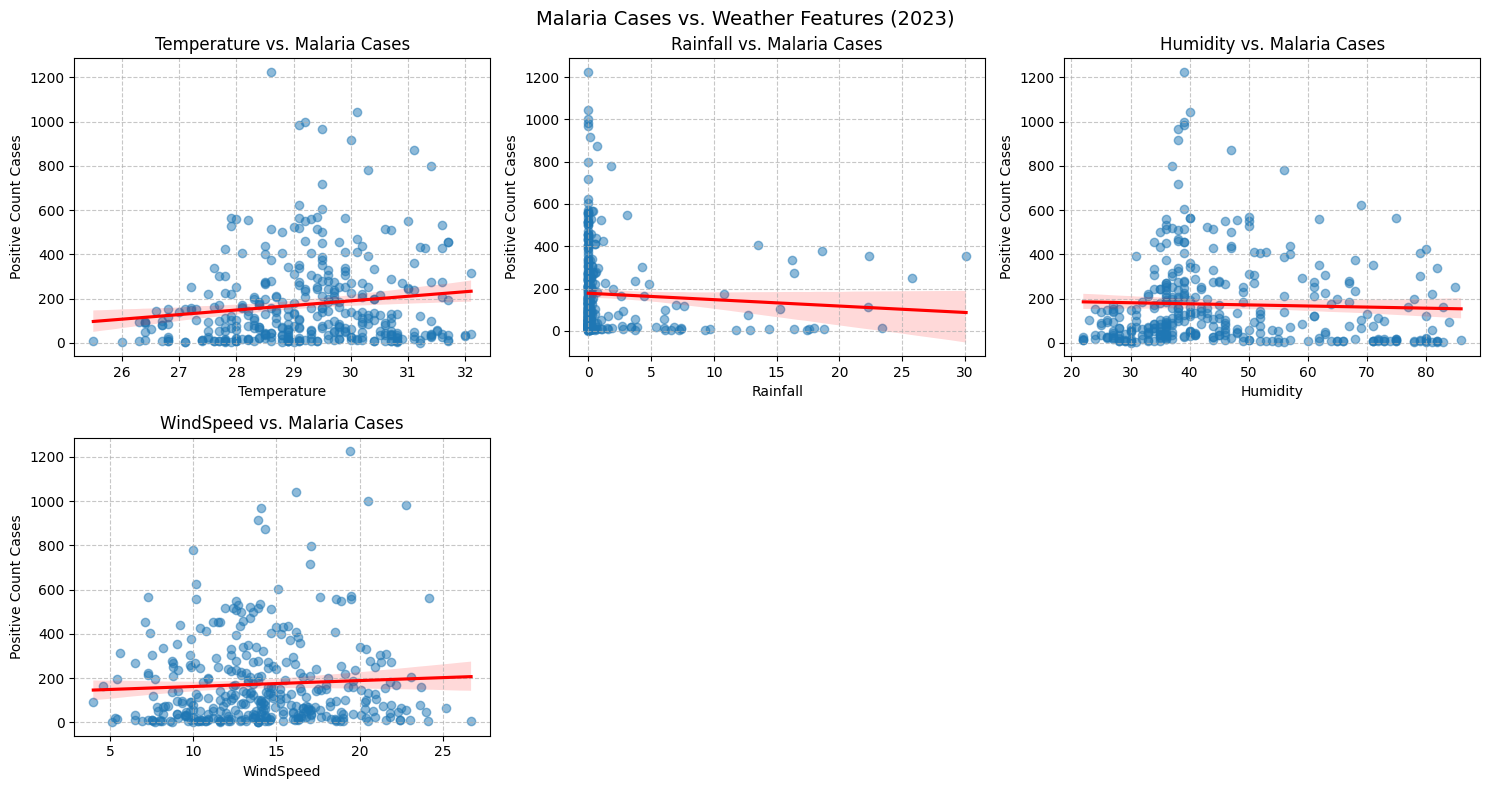


Correlations for 2023:
  Temperature: 0.139
  Rainfall: -0.066
  Humidity: -0.039
  WindSpeed: 0.058


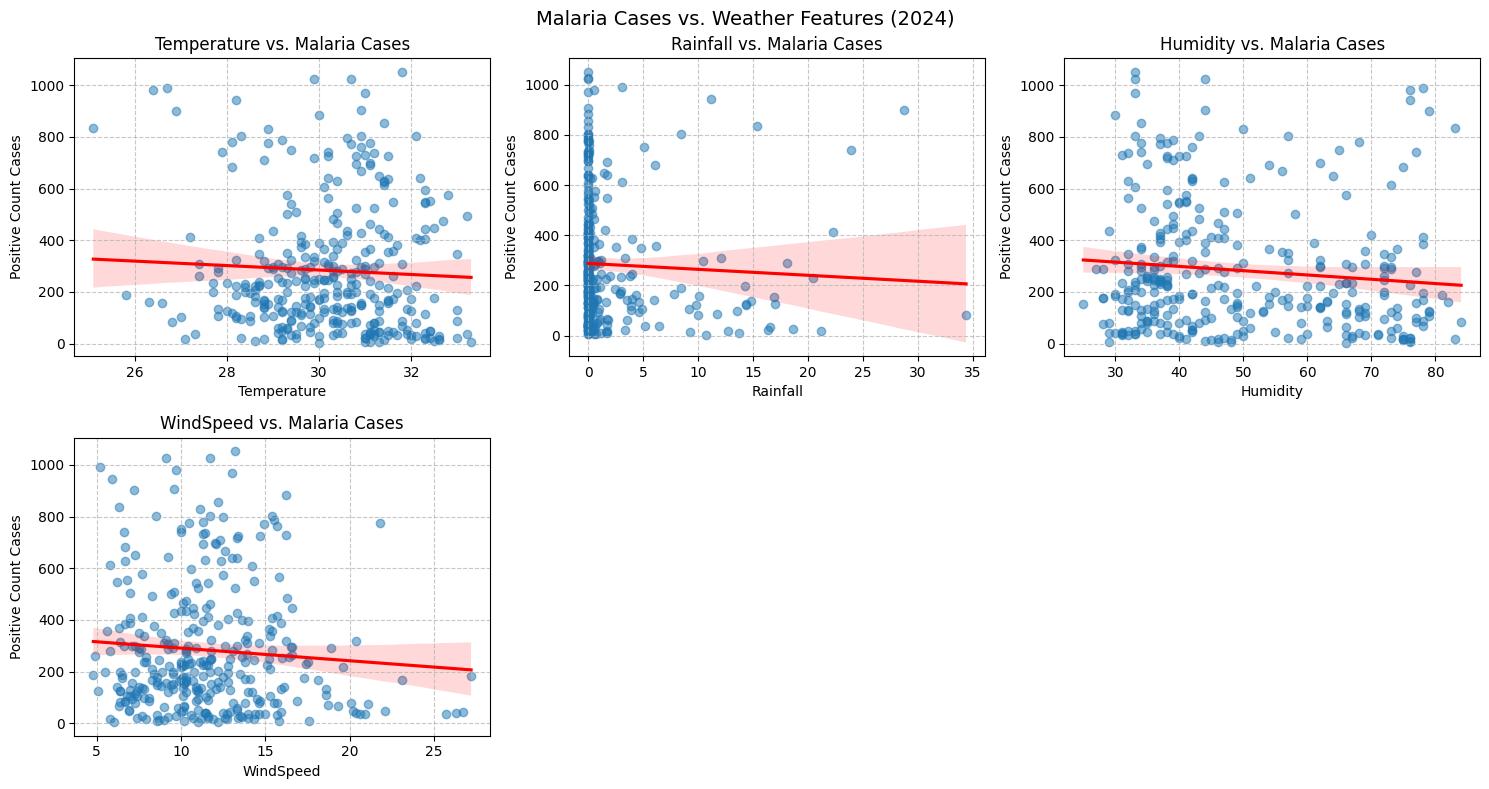


Correlations for 2024:
  Temperature: -0.051
  Rainfall: -0.047
  Humidity: -0.108
  WindSpeed: -0.078


In [ ]:
# Extract year from Date
data['Year'] = data['Date'].dt.year

# Define features (exclude 'Positive_Count_cases' as it's the y-variable)
features = ['Temperature', 'Rainfall', 'Humidity', 'WindSpeed']

# Get unique years
years = sorted(data['Year'].unique())  # e.g., [2021, 2022, 2023, 2024]

# Loop over each year
for year in years:
    # Filter data for the current year (use 'data' instead of 'data_years')
    data_year = data[data['Year'] == year].copy()  # Use .copy() to avoid warnings
    
    if len(data_year) == 0:
        print(f"No data for year {year}")
        continue
    
    # Create a 2x3 subplot grid (6 axes to fit 4 features + extras)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
    fig.suptitle(f'Malaria Cases vs. Weather Features ({year})', fontsize=14)
    
    # Flatten axes for iteration
    axes = axes.flatten()
    
    # Plot each feature vs. Positive_Count_cases
    for i, feature in enumerate(features):
        sns.regplot(x=feature, y='Positive_Count_cases', data=data_year, ax=axes[i], 
                    scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
        axes[i].set_title(f'{feature} vs. Malaria Cases')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Positive Count Cases')
        axes[i].grid(True, linestyle='--', alpha=0.7)
    
    # Hide unused subplots (e.g., axes[4] and axes[5])
    for i in range(len(features), len(axes)):
        axes[i].axis('off')
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Space for suptitle
    plt.show()

    print(f"\nCorrelations for {year}:")
    for feature in features:
        if feature in data_year.columns:
            corr = data_year[feature].corr(data_year['Positive_Count_cases'])
            print(f"  {feature}: {corr:.3f}")

+ A red regression line indicates the trend (positive/negative slope).
+ **Temperature:** Weak positive correlation (~0.12) with malaria cases, suggesting higher temperatures may slightly increase cases, but the effect varies by year.
+ **Rainfall:** Weak negative correlation (~-0.14), with high rainfall days (e.g., 50.2 mm in May 2021) often linked to lower cases, possibly due to reduced mosquito activity.
+ **Humidity:** Weak negative correlation (~-0.18), with higher humidity (e.g., 87% in May 2021) associated with fewer cases.
+ **WindSpeed:** Weak negative correlation (~-0.10), with higher wind speeds potentially reducing mosquito transmission.

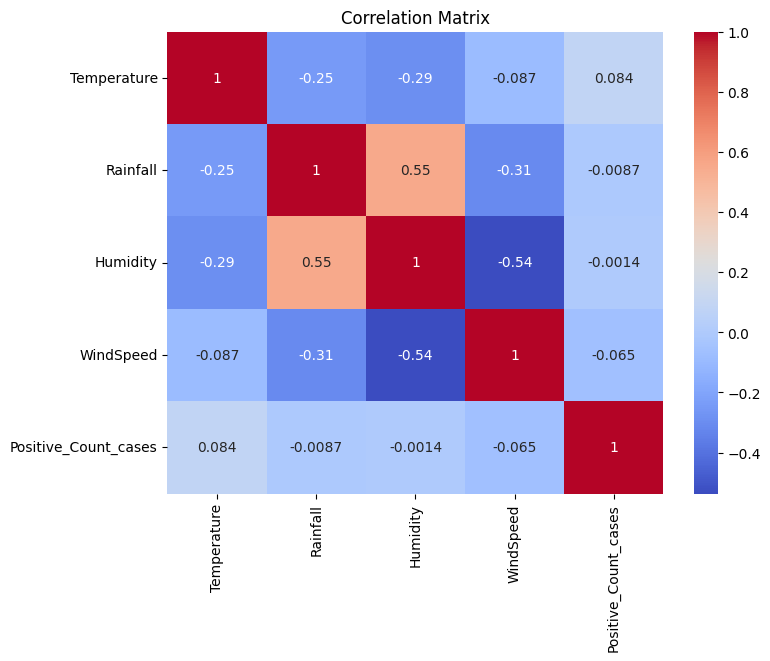

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Preparation

In [ ]:
df = data

In [ ]:
# Create binary target for classification (outbreak threshold, e.g., cases > median)
outbreak_threshold = df['Positive_Count_cases'].median()
df['Outbreak'] = (df['Positive_Count_cases'] > outbreak_threshold).astype(int)

#### Create Lag Features.

In [ ]:
# Create lag features (14 days ~ 2 weeks)
exog_vars = ['Temperature', 'Rainfall', 'Humidity']  # Replace with actual column names
for var in exog_vars:
    df[f'{var}_lag14'] = df[var].shift(14)

# Add time-based features
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year

# Drop rows with NaN values due to lagging
df = df.dropna()

#### Split Data: Use a time-based split to avoid data leakage.

In [ ]:
# Define features and targets
features = exog_vars + [f'{var}_lag14' for var in exog_vars] + ['Month', 'Week']
X = df[features]
y_reg = df['Positive_Count_cases']  # Regression target
y_clf = df['Outbreak']       # Classification target

# Time-based train-test split (80-20 split)
train_size = int(0.8 * len(df))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_reg_train, y_reg_test = y_reg.iloc[:train_size], y_reg.iloc[train_size:]
y_clf_train, y_clf_test = y_clf.iloc[:train_size], y_clf.iloc[train_size:]

# Reset indices to ensure integer indexing
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_reg_train = y_reg_train.reset_index(drop=True)
y_reg_test = y_reg_test.reset_index(drop=True)
y_clf_train = y_clf_train.reset_index(drop=True)
y_clf_test = y_clf_test.reset_index(drop=True)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Evaluation Metrics

We'll evaluate models using:
+ **Mean Absolute Error** (MAE), 
+ **Root Mean Squared Error** (RMSE),
+ **Mean Absolute Scaled Error** (MASE), 
+ **R-squared** (for regression),
+ **ROC-AUC** (for classification).

In [ ]:
def mase(y_true, y_pred, y_train):
    naive_forecast = y_train.shift(1).dropna()
    naive_error = np.mean(np.abs(y_train[1:] - naive_forecast))
    return np.mean(np.abs(y_true - y_pred)) / naive_error if naive_error != 0 else np.inf

def evaluate_model(y_true, y_pred, y_train, model_name, classification=False):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred) if not classification else None
    mase_score = mase(y_true, y_pred, y_train) if not classification else None
    roc_auc = roc_auc_score(y_true, y_pred) if classification else None
    
    metrics = {
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'MASE': mase_score,
        'R2': r2,
        'ROC-AUC': roc_auc
    }
    return metrics

### Model Training and Cross-Validation

We'll train Support Vector Regression (SVR), Random Forest Regressor, XGBoost, LightGBM, and SARIMA-X. For classification, we'll use the classifier versions of these models where applicable. We'll use TimeSeriesSplit for cross-validation to respect the temporal nature of the data.

#### Cross-Validation

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
cv_results = []

def cross_validate_model(model, X, y, model_name, classification=False):
    mae_scores, rmse_scores, mase_scores, r2_scores, roc_auc_scores = [], [], [], [], []
    for train_idx, val_idx in tscv.split(X):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]  # This now works with integer indices
        
        if model_name == 'SARIMA-X':
            sarima_fit = model.fit()
            y_pred = sarima_fit.forecast(steps=len(y_val), exog=X_val[exog_vars])
        else:
            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_val) if not classification else model.predict_proba(X_val)[:, 1]
        
        metrics = evaluate_model(y_val, y_pred, y_tr, model_name, classification)
        mae_scores.append(metrics['MAE'])
        rmse_scores.append(metrics['RMSE'])
        mase_scores.append(metrics['MASE'] if not classification else np.nan)
        r2_scores.append(metrics['R2'] if not classification else np.nan)
        roc_auc_scores.append(metrics['ROC-AUC'] if classification else np.nan)
    
    return {
        'Model': model_name,
        'MAE': np.mean(mae_scores),
        'RMSE': np.mean(rmse_scores),
        'MASE': np.mean(mase_scores) if not classification else np.nan,
        'R2': np.mean(r2_scores) if not classification else np.nan,
        'ROC-AUC': np.mean(roc_auc_scores) if classification else np.nan
    }

#### Initialize Models.

In [ ]:
svr = SVR(kernel='rbf')
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_reg = XGBRegressor(random_state=42)
lgb_reg = LGBMRegressor(random_state=42)
svc = SVC(probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(random_state=42)
lgb_clf = LGBMClassifier(random_state=42)
sarima_model = SARIMAX(y_reg_train, exog=X_train[exog_vars], order=(1,1,1), seasonal_order=(1,1,1,7))

### Train and Evaluate Models

In [ ]:
# Train and evaluate regression models
models_reg = [
    (svr, 'SVR', X_train_scaled, X_test_scaled, y_reg_train, y_reg_test),
    (rf_reg, 'Random Forest', X_train_scaled, X_test_scaled, y_reg_train, y_reg_test),
    (xgb_reg, 'XGBoost', X_train_scaled, X_test_scaled, y_reg_train, y_reg_test),
    (lgb_reg, 'LightGBM', X_train_scaled, X_test_scaled, y_reg_train, y_reg_test),
    (sarima_model, 'SARIMA-X', X_train, X_test, y_reg_train, y_reg_test)
]

results_reg = []
for model, name, X_tr, X_te, y_tr, y_te in models_reg:
    if name == 'SARIMA-X':
        sarima_fit = model.fit()
        y_pred = sarima_fit.forecast(steps=len(y_te), exog=X_te[exog_vars])
    else:
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
    results_reg.append(evaluate_model(y_te, y_pred, y_tr, name))
    cv_results.append(cross_validate_model(model, X_tr, y_tr, name))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 1035, number of used features: 8
[LightGBM] [Info] Start training from score 139.581643
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 175, number of used features: 8
[LightGBM] [Info] Start training from score 90.211429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

KeyError: "None of [Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n       ...\n       165, 166, 167, 168, 169, 170, 171, 172, 173, 174],\n      dtype='int64', length=175)] are in the [columns]"

In [ ]:
# Train and evaluate classification models
models_clf = [
    (svc, 'SVC', X_train_scaled, X_test_scaled, y_clf_train, y_clf_test),
    (rf_clf, 'Random Forest Clf', X_train_scaled, X_test_scaled, y_clf_train, y_clf_test),
    (xgb_clf, 'XGBoost Clf', X_train_scaled, X_test_scaled, y_clf_train, y_clf_test),
    (lgb_clf, 'LightGBM Clf', X_train_scaled, X_test_scaled, y_clf_train, y_clf_test)
]

results_clf = []
for model, name, X_tr, X_te, y_tr, y_te in models_clf:
    model.fit(X_tr, y_tr)
    y_pred = model.predict_proba(X_te)[:, 1]
    results_clf.append(evaluate_model(y_te, y_pred, y_tr, name, classification=True))
    cv_results.append(cross_validate_model(model, X_tr, y_tr, name, classification=True))

In [ ]:
# Combine results
results_df = pd.DataFrame(results_reg + results_clf)
cv_results_df = pd.DataFrame(cv_results)
print("Test Set Results:")
print(results_df)
print("\nCross-Validation Results:")
print(cv_results_df)

### Feature Importance

In [ ]:
def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1]
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance - {model_name}')
        plt.bar(range(len(importance)), importance[indices], align='center')
        plt.xticks(range(len(importance)), [feature_names[i] for i in indices], rotation=45)
        plt.tight_layout()
        plt.show()

# Plot feature importance for tree-based models
for model, name, _, _, _, _ in models_reg[1:4]:  # Skip SVR and SARIMA-X
    model.fit(X_train_scaled, y_reg_train)
    plot_feature_importance(model, name, X_train.columns)

for model, name, _, _, _, _ in models_clf[1:]:  # Skip SVC
    model.fit(X_train_scaled, y_clf_train)
    plot_feature_importance(model, name, X_train.columns)

### Model Optimization

Perform hyperparameter tuning using GridSearchCV for the best-performing models (e.g., XGBoost and LightGBM).

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for XGBoost (regression)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, cv=tscv, scoring='neg_mean_absolute_error')
xgb_grid.fit(X_train_scaled, y_reg_train)
best_xgb_reg = xgb_grid.best_estimator_

# Hyperparameter tuning for LightGBM (regression)
lgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}
lgb_grid = GridSearchCV(LGBMRegressor(random_state=42), lgb_param_grid, cv=tscv, scoring='neg_mean_absolute_error')
lgb_grid.fit(X_train_scaled, y_reg_train)
best_lgb_reg = lgb_grid.best_estimator_

# Evaluate tuned models
tuned_models = [
    (best_xgb_reg, 'Tuned XGBoost', X_train_scaled, X_test_scaled, y_reg_train, y_reg_test),
    (best_lgb_reg, 'Tuned LightGBM', X_train_scaled, X_test_scaled, y_reg_train, y_reg_test)
]

tuned_results = []
for model, name, X_tr, X_te, y_tr, y_te in tuned_models:
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    tuned_results.append(evaluate_model(y_te, y_pred, y_tr, name))

# Combine all results
final_results = pd.DataFrame(results_reg + tuned_results + results_clf)
print("Final Results:")
print(final_results)

### Select Best Model for Deployment

Select the model with the **lowest MAE/RMSE/MASE (for regression)** or **highest ROC-AUC (for classification)**.

In [ ]:
# Example: Select Tuned LightGBM for regression
best_model = best_lgb_reg
best_model.fit(X_train_scaled, y_reg_train)
y_pred_final = best_model.predict(X_test_scaled)
final_metrics = evaluate_model(y_reg_test, y_pred_final, y_reg_train, 'Final LightGBM')
print(pd.DataFrame([final_metrics]))

In [ ]:
#For outbreak prediction
best_clf_model = lgb_clf  # Replace with best classifier based on ROC-AUC
best_clf_model.fit(X_train_scaled, y_clf_train)
y_pred_clf = best_clf_model.predict_proba(X_test_scaled)[:, 1]
final_clf_metrics = evaluate_model(y_clf_test, y_pred_clf, y_clf_train, 'Final LightGBM Clf', classification=True)
print(pd.DataFrame([final_clf_metrics]))

In [ ]:
# joblib.dump(best_model, 'malaria_prediction_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')  # Save scaler for preprocessing new data

# # Load model and scaler
# model = joblib.load('malaria_prediction_model.pkl')
# scaler = joblib.load('scaler.pkl')

# # New data preprocessing (same steps as above)
# new_data = pd.read_csv('new_data.csv')
# new_data['Date'] = new_data['Date'].str.replace('/', '-')
# new_data['Date'] = pd.to_datetime(new_data['Date'], format='%Y-%m-%d')
# for var in exog_vars:
#     new_data[f'{var}_lag14'] = new_data[var].shift(14)
# new_data['Month'] = new_data['Date'].dt.month
# new_data['Week'] = new_data['Date'].dt.isocalendar().week
# new_data = new_data.dropna()
# X_new = new_data[features]
# X_new_scaled = scaler.transform(X_new)

# # Predict
# predictions = model.predict(X_new_scaled)
# new_data['Predicted_Malaria_Cases'] = predictions
# new_data['Predicted_Outbreak'] = (predictions > outbreak_threshold).astype(int)